In [37]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import r2_score
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [38]:
def plot_learning_curve(estimator, # 学习器
                        title, X, y, 
                        cv=5, # 使用几折交叉验证
                        n_jobs=None, # 进行训练的CPU核心个数,默认n_jobs=1(n_jobs=-1:使用所有CPU核心进行训练)
                        train_sizes=np.linspace(0.1, 1, 10), # 训练数据所占的比例
                        scoring=None):
    plt.figure()
    plt.title(title, size=20)
    plt.xlabel("Training examples", size=15)
    if scoring:
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, 
            scoring=make_scorer(scoring)) # 默认为None,使用训练器的score方法 
        plt.ylabel(scoring.__name__, color='yellow', size=20)
    else:
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, 
            scoring=scoring)
        plt.ylabel('score', color='yellow', size=20)
        
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    

In [39]:

boston = datasets.load_boston() # 波士顿房价数据集
X = boston.data
y = boston.target

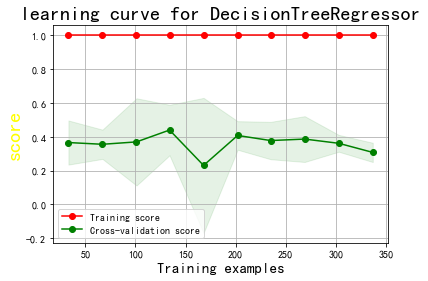

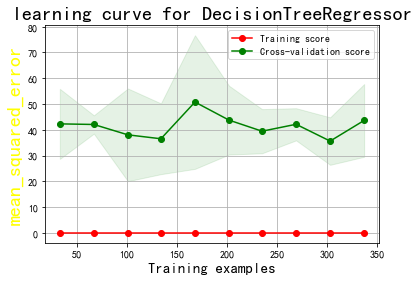

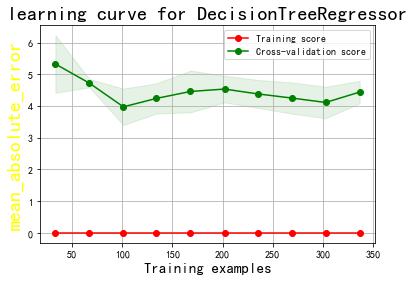

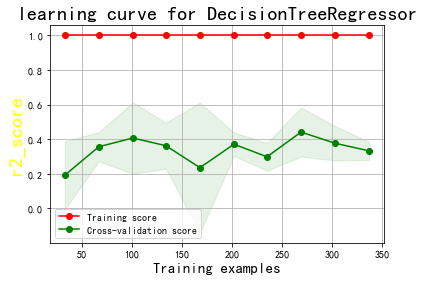

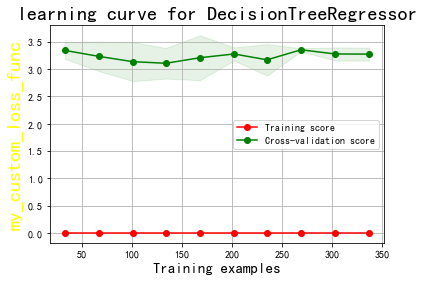

In [41]:
estimator_obj = DecisionTreeRegressor()
title = 'learning curve for DecisionTreeRegressor'
def my_custom_loss_func(y_true, y_pred):
     diff = np.abs(y_true - y_pred).max()
     return np.log1p(diff) # 必须返回一个浮点数

score_list = [None, mean_squared_error, mean_absolute_error, r2_score,
              my_custom_loss_func] # 自定义score funcion(or loss function)
for i in score_list:
        plot_learning_curve(estimator_obj, title, X, y, cv=3, n_jobs=-1,
                        train_sizes=np.linspace(0.1, 1.0, 10), scoring=i) # 存在过拟合